In [1]:
# import sportsref
# import os, csv, sqlite3
import pandas as pd
import numpy as np
import time
import glob
from datetime import datetime

# importing csvs to dataframes

In [23]:
# list of dataframes
gmin = 'gameInfo'
inst = 'injuryStatus'
psdr = 'passDirections'
snct = 'snapCounts'
strt = 'starters'
sdef = 'statsDefense'
skck = 'statsKicking'
soff = 'statsOffense'
srtn = 'statsReturns'
stm  = 'statsTeam'
tmrs = 'teamRoster'

dfl = [gmin, inst, psdr, snct, strt, sdef, skck, soff, srtn, stm, tmrs]

In [24]:
dfIn = {
    'gameInfo'      :['season','week','bsID'                  ],
    'injuryStatus'  :['season','week',       'team','playerID'],
    'passDirections':['season','week','bsID','team','playerID'],
    'snapCounts'    :['season','week','bsID','team','playerID'],
    'starters'      :['season','week','bsID','team','playerID'],
    'statsDefense'  :['season','week','bsID','team','playerID'],
    'statsKicking'  :['season','week','bsID','team','playerID'],
    'statsOffense'  :['season','week','bsID','team','playerID'],
    'statsReturns'  :['season','week','bsID','team','playerID'],
    'statsTeam'     :['season','week','bsID','team'           ],
    'teamRoster'    :['season',              'team','playerID'],
}

In [25]:
# import csvs into dataframes
directory = '/Users/phil/Google Drive/nfl/data'
# directory = 'C:/Users/phil/Google Drive/nfl/data'
# directory = 'C:/Users/lyncp010/projects/nfl/data'

d = {}
for key in dfIn:
    print glob.glob(directory + '/{}*.csv'.format(key))[0]
    d[key] = pd.read_csv(glob.glob(directory + '/{}*.csv'.format(key))[0], low_memory=False)
    d[key].set_index(dfIn[key], inplace=True)
    d[key].sortlevel(inplace=True)
print 'tables imported'

/Users/phil/Google Drive/nfl/data/gameInfo_07_16w2.csv
/Users/phil/Google Drive/nfl/data/statsTeam_07_16w2.csv
/Users/phil/Google Drive/nfl/data/statsDefense_07_16w2.csv
/Users/phil/Google Drive/nfl/data/snapCounts_07_16w2.csv
/Users/phil/Google Drive/nfl/data/passDirections_07_16w2.csv
/Users/phil/Google Drive/nfl/data/statsKicking_07_16w2.csv
/Users/phil/Google Drive/nfl/data/teamRoster_07_16w2.csv
/Users/phil/Google Drive/nfl/data/starters_07_16w2.csv
/Users/phil/Google Drive/nfl/data/injuryStatus_07_16w2.csv
/Users/phil/Google Drive/nfl/data/statsOffense_07_16w2.csv
/Users/phil/Google Drive/nfl/data/statsReturns_07_16w2.csv
tables imported


#### fix roster

In [26]:
# fixing roster experience
d[tmrs].ix[d[tmrs]['experience']=='Rook', 'experience'] = '0'
d[tmrs]['experience'] = d[tmrs]['experience'].astype(float)

#### fix team stats

In [27]:
idx = pd.IndexSlice
homeAwayOpp = {True:'away', False:'home'}

for i, r in d[stm].iterrows():
    print '\r{}'.format(i),
    seas = i[0]
    week = i[1]
    bsid = i[2]
    team = i[3]
    d[stm].loc[i, 'opponent'] = d[gmin].loc[idx[[seas],[week],[bsid]],][homeAwayOpp[r['home']]][0] #foo[homeAwayOpp[r['home']]][0]
    foo = d[stm].loc[idx[[seas],[week],[bsid],d[stm].loc[i, 'opponent']],]
    d[stm].loc[i, 'defPassCmpAlw'] = foo['passCmp'][0]
    d[stm].loc[i, 'defPassYdsAlw'] = foo['passYds'][0]
    d[stm].loc[i, 'defPassTdsAlw'] = foo['passTds'][0]
    d[stm].loc[i, 'defRushYdsAlw'] = foo['rushYds'][0]
    d[stm].loc[i, 'defRushTdsAlw'] = foo['rushTds'][0]
    d[stm].loc[i, 'defTotalYardsAlw'] = foo['totalYards'][0]
    d[stm].loc[i, 'defFirstDownsAlw'] = foo['firstDowns'][0]
    d[stm].loc[i, 'defPassInt'] = foo['passInt'][0]
    d[stm].loc[i, 'defSacks'] = foo['sacks'][0]
    d[stm].loc[i, 'defSacksYds'] = foo['sacksYds'][0]
    d[stm].loc[i, 'defFFumbles'] = foo['fumbles'][0]
    
d[stm] = d[stm].rename(columns = {
        'passAtt':'offPassAtt',
        'passCmp':'offPassCmp',
        'passYds':'offPassYds',
        'netPassYards':'offNetPassYards',
        'passTds':'offPassTds',
        'rushAtt':'offRushAtt',
        'rushYds':'offRushYds',
        'rushTds':'offRushTds',
        'totalYards':'offTotalYards',
        'firstDowns':'offFirstDowns',
        'sacks':'offSacks',
        'sacksYds':'offSacksYds',
        'passInt':'offPassInt',
        'fumbles':'offFumbles',
        'fumblesLost':'offFumblesLost',
        'turnovers':'offTurnovers',
        'thirdDownAtt':'offThirdDownAtt',
        'thirdDownConv':'offThirdDownConv',
        'fourthDownAtt':'offFourthDownAtt',
        'fourthDownConv':'offFourthDownConv'
    })

# fixing time
d[stm]['timeOfPossession'] = d[stm]['timeOfPossession'].apply(lambda x: float(x.split(':')[0]) + float(x.split(':')[1])/60)

# fixing column order
cols = ['home', 'opponent']
cols += [c for c in d[stm].columns if ('off' in c)]
cols += [c for c in d[stm].columns if ('def' in c)]
cols += ['pentalties', 'pentaltiesYds', 'timeOfPossession']
d[stm] = d[stm][cols]

(2016, 2, '201609190chi', 'phi')


In [28]:
# print data frames with indexes + columns
for df in sorted(dfl):
    print df + '\n'+'-'*len(df)
    for i in d[df].index.names:
        print '* {}'.format(i)
    print d[df].dtypes
    print '\n'

gameInfo
--------
* season
* week
* bsID
date            object
weekday         object
startTime       object
home            object
away            object
winner          object
homeScore        int64
awayScore        int64
line           float64
overUnder      float64
roof            object
surface         object
temp             int64
relHumidity    float64
windChill        int64
windMPH          int64
dtype: object


injuryStatus
------------
* season
* week
* team
* playerID
status        object
didNotPlay      bool
dtype: object


passDirections
--------------
* season
* week
* bsID
* team
* playerID
rec_catches_d         float64
rec_catches_dl        float64
rec_catches_dm        float64
rec_catches_dr        float64
rec_catches_s         float64
rec_catches_sl        float64
rec_catches_sm        float64
rec_catches_sr        float64
rec_targets_d         float64
rec_targets_dl        float64
rec_targets_dm        float64
rec_targets_dr        float64
rec_targets_s         floa

# feature engineering

In [29]:
# games.loc[idx[[2015],[1],:],]

In [30]:
start = time.time()
idx = pd.IndexSlice

# adding features to quarterback df
games = d[gmin].loc[idx[range(2009,2010),range(1,4)],].copy()

homeAwayOpp = {True:'away', False:'home'}
first_season = 2007

for i, r in games.iterrows():
    print '\r{}'.format(i),
    seas = i[0]
    week = i[1]
    bsid = i[2]
    games.loc[i, 'week'] = week
    
    for tm in ('home', 'away'):
        team = games.loc[i, tm]
        # previous season stats
        foo = d[stm].loc[idx[[seas-1],:,:,[team]],]
        for col in [c for c in d[stm].columns if c not in ('home', 'opponent')]:
            games.loc[i, tm + 'PrevSeas' + col[0].upper() + col[1:] + 'Avg'] = foo[col].mean()
            
        # current season stats
        foo = d[stm].loc[idx[[seas],range(1,week),:,[games.loc[i, tm]]],]
        for col in [c for c in d[stm].columns if c not in ('home', 'opponent')]:
            games.loc[i, tm + 'CurSeas' + col[0].upper() + col[1:] + 'Avg'] = foo[col].mean()
            
        # rest days
        if week==1:
            games.loc[i, tm + 'RestDays'] = 14.0
        else:
            df = d[gmin].loc[idx[[seas],[week-1,week-2],:],]
            gameDate = datetime.strptime(games.loc[i, 'date'], '%Y-%m-%d')
            lastGameDate = datetime.strptime(df[(df['home']==team) | (df['away']==team)]['date'][-1], '%Y-%m-%d')
            games.loc[i, tm + 'RestDays'] = (gameDate - lastGameDate).days
            
        # prev season pff approx value
        curRoster = [x[2] for x in d[tmrs].loc[idx[[seas],[team],:],].index.tolist()]
        games.loc[i, tm + 'PrevSeasTeamPfrAv' + 'Sum'] = d[tmrs].loc[idx[[seas-1],:,curRoster],]['pfrApproxValue'].sum()
        foo = d[strt].loc[idx[[seas-1],:,:,:,curRoster],]
        prevSeasStartersOff = set([x[4] for x in foo[foo.offense == True].index.tolist()])
        prevSeasStartersDef = set([x[4] for x in foo[foo.offense == False].index.tolist()])
        games.loc[i, tm + 'PrevSeasStartersOffPfrAv' + 'Sum'] = d[tmrs].loc[idx[[seas-1],:,prevSeasStartersOff],]['pfrApproxValue'].sum()
        games.loc[i, tm + 'PrevSeasStartersDefPfrAv' + 'Sum'] = d[tmrs].loc[idx[[seas-1],:,prevSeasStartersDef],]['pfrApproxValue'].sum()
        
        # qb pfr
        foo = d[strt].loc[idx[[seas],[week],[bsid],[team],:],]
        starterQB = foo[foo.position=='QB'].index.tolist()[0][4]
        games.loc[i, tm + 'PrevSeasStarterQbPfrAv'] = d[tmrs].loc[idx[[seas-1],:,starterQB],]['pfrApproxValue'].sum()
    
    
games['trueLine'] = games['awayScore'] - games['homeScore']
print '\nDone! Total run time: {}'.format(time.time() - start)

(2009, 3, '200909280dal') 
Done! Total run time: 7.88009977341


In [230]:
games.tail()

date weekday startTime home away winner  \
season week bsID                                                          
2009   3    200909270rav  2009-09-27  Sunday    1:02pm  rav  cle    rav   
            200909270sdg  2009-09-27  Sunday    4:15pm  sdg  mia    sdg   
            200909270sea  2009-09-27  Sunday    4:06pm  sea  chi    chi   
            200909270tam  2009-09-27  Sunday    1:00pm  tam  nyg    nyg   
            200909280dal  2009-09-28  Monday    8:40pm  dal  car    dal   

                          homeScore  awayScore  line  overUnder    ...     \
season week bsID                                                   ...      
2009   3    200909270rav         34          3 -13.5       38.5    ...      
            200909270sdg         23         13  -5.5       45.5    ...      
            200909270sea         19         25  -2.5       37.5    ...      
            200909270tam          0         24  -6.5       46.0    ...      
            200909280dal         21          7  -8.5       48.5    ...      

                         awayCurSeasDefFFumblesAvg awayCurSeasPentaltiesAvg  \
season week bsID                                                              
2009   3    200909270rav                       0.5                      4.5   
            200909270sdg                       0.5                      3.0   
            200909270sea                       1.0                      2.0   
            200909270tam                       2.0                      0.5   
            200909280dal                       1.5                      3.0   

                          awayCurSeasPentaltiesYdsAvg  \
season week bsID                                        
2009   3    200909270rav                         20.5   
            200909270sdg                         16.0   
            200909270sea                          8.0   
            200909270tam                          4.0   
            200909280dal                         33.5   

                          awayCurSeasTimeOfPossessionAvg  awayRestDays  \
season week bsID                                                         
2009   3    200909270rav                       26.950000           7.0   
            200909270sdg                       37.116667           6.0   
            200909270sea                       31.308333           7.0   
            200909270tam                       35.475000           7.0   
            200909280dal                       28.425000           8.0   

                          awayPrevSeasTeamPfrAvSum  \
season week bsID                                     
2009   3    200909270rav                     191.0   
            200909270sdg                     195.0   
            200909270sea                     207.0   
            200909270tam                     226.0   
            200909280dal                     217.0   

                          awayPrevSeasStartersOffPfrAvSum  \
season week bsID                                            
2009   3    200909270rav                             74.0   
            200909270sdg                            114.0   
            200909270sea                             79.0   
            200909270tam                             97.0   
            200909280dal                             99.0   

                          awayPrevSeasStartersDefPfrAvSum  \
season week bsID                                            
2009   3    200909270rav                             98.0   
            200909270sdg                             96.0   
            200909270sea                            112.0   
            200909270tam                            116.0   
            200909280dal                             94.0   

                          awayPrevSeasStarterQbPfrAv  trueLine  
season week bsID                                                
2009   3    200909270rav                         1.0       -31  
            200909270sdg                        13.0       -10 

In [12]:
print 'games' + '\n'+'-'*len('games')
for i in games.index.names:
    print '* {}'.format(i)
print games.dtypes

games
-----
* season
* week
* bsID
date                                object
weekday                             object
startTime                           object
home                                object
away                                object
winner                              object
homeScore                            int64
awayScore                            int64
line                               float64
overUnder                          float64
roof                                object
surface                             object
temp                                 int64
relHumidity                        float64
windChill                            int64
windMPH                              int64
week                               float64
homePrevSeasOffPassAttAvg          float64
homePrevSeasOffPassCmpAvg          float64
homePrevSeasOffPassYdsAvg          float64
homePrevSeasOffNetPassYardsAvg     float64
homePrevSeasOffPassTdsAvg          float64
homePrevSeasOffRush

# xgb

In [20]:
# import os
# mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-6.1.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
# os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
import xgboost as xgb
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

#### setup columns

In [231]:
contCols = [col for col in games.columns if any(x in col for x in ['home','away'])]
for col in ['home', 'away', 'homeScore', 'awayScore']: contCols.remove(col)

In [232]:
contCols

['homePrevSeasOffPassAttAvg',
 'homePrevSeasOffPassCmpAvg',
 'homePrevSeasOffPassYdsAvg',
 'homePrevSeasOffNetPassYardsAvg',
 'homePrevSeasOffPassTdsAvg',
 'homePrevSeasOffRushAttAvg',
 'homePrevSeasOffRushYdsAvg',
 'homePrevSeasOffRushTdsAvg',
 'homePrevSeasOffTotalYardsAvg',
 'homePrevSeasOffFirstDownsAvg',
 'homePrevSeasOffSacksAvg',
 'homePrevSeasOffSacksYdsAvg',
 'homePrevSeasOffPassIntAvg',
 'homePrevSeasOffFumblesAvg',
 'homePrevSeasOffFumblesLostAvg',
 'homePrevSeasOffTurnoversAvg',
 'homePrevSeasOffThirdDownAttAvg',
 'homePrevSeasOffThirdDownConvAvg',
 'homePrevSeasOffFourthDownAttAvg',
 'homePrevSeasOffFourthDownConvAvg',
 'homePrevSeasDefPassCmpAlwAvg',
 'homePrevSeasDefPassYdsAlwAvg',
 'homePrevSeasDefPassTdsAlwAvg',
 'homePrevSeasDefRushYdsAlwAvg',
 'homePrevSeasDefRushTdsAlwAvg',
 'homePrevSeasDefTotalYardsAlwAvg',
 'homePrevSeasDefFirstDownsAlwAvg',
 'homePrevSeasDefPassIntAvg',
 'homePrevSeasDefSacksAvg',
 'homePrevSeasDefSacksYdsAvg',
 'homePrevSeasDefFFumblesAvg',
 'h

In [233]:
df_X = games[contCols]
df_y = games['trueLine']

#### model parameters

In [24]:
grid = {
    'eta': [0.05], #[x / 100.0 for x in range(5, 25, 5)],
    'gamma': [0.0], #[x / 10.0 for x in range(0,3)],
    'max_depth': range(3, 6),
    'min_child_weight': [1], #range(1, 4, 2),
    'subsample': [1.0],
    'colsample_bytree': [x / 10.0 for x in range(5,11,5)]
}
grid

{'colsample_bytree': [0.5, 1.0],
 'eta': [0.05],
 'gamma': [0.0],
 'max_depth': [3, 4, 5],
 'min_child_weight': [1],
 'subsample': [1.0]}

In [25]:
# number of grid combincations
grid_n = 1
for key in grid.keys():
    grid_n *= len(grid[key])
print grid_n

6


In [26]:
start = time.time()

# train/test on 2014/2015
game_model_results = pd.DataFrame()

# setting hyper parameters
model_param = {
    'objective':'reg:linear',
    'eval_metric':'rmse',
    'nthread':5,
    'silent':1
}

num_round = 200
model_results = {}

print 'Training...'
for i, gs in enumerate(itertools.islice(itertools.product(
    grid['eta'],
    grid['gamma'],
    grid['max_depth'],
    grid['min_child_weight'],
    grid['subsample'],
    grid['colsample_bytree'],
), grid_n)):
    tree_param = {
        'eta':gs[0],
        'gamma':gs[1],
        'max_depth':gs[2],
        'min_child_weight':gs[3],
        'subsample':gs[4],
        'colsample_bytree':gs[5]
    }
    
    param = model_param.copy()
    param.update(tree_param)
    
    for season in range(2013, 2015 + 1):
        for week in range(1, 21 + 1):
            print '\rGrid {}/{} - Season {} - Week {}'.format(i+1, grid_n, season, week),
            
            # setup X/y trn/tst
            X_trn = df_X.loc[idx[range(2009,season),:,:],]
            X_trn = X_trn.append(df_X.loc[idx[[season],range(1,week),:],])
            X_tst = df_X.loc[idx[[season],[week],:],]
            
            y_trn = df_y.loc[idx[range(2009,season),:,:],]
            y_trn = y_trn.append(df_y.loc[idx[[season],range(1,week),:],])
            y_tst = df_y.loc[idx[[season],[week],:],]
            
            # convert to DMatrix
            dtrn  = xgb.DMatrix(X_trn, label=y_trn)
            dtst  = xgb.DMatrix(X_tst, label=y_tst)  
            
            # train model
            evallist  = [(dtrn,'train'), (dtst,'test')]
            bst = xgb.train( param, dtrn, num_round, evallist ,verbose_eval=None, evals_result=model_results)
            
            # export results to df
            week_results = pd.DataFrame(tree_param, index=[0])
            week_results['season'] = season
            week_results['week'] = week
            week_results['rmse_rows'] = len(y_tst)
            week_results = pd.concat([week_results] * num_round, ignore_index=True)
            week_results['round'] = range(len(week_results))
            week_results['rmse_test'] = pd.DataFrame(model_results['test'])
            week_results['rmse_train'] = pd.DataFrame(model_results['train'])
            
            # week_results = pd.merge(df_params, df_eval, left_index=True, right_index=True)
            game_model_results = pd.concat([game_model_results, week_results], ignore_index=True)

print '\rDone! Total run time: {}'.format(time.time() - start)

Training...
Done! Total run time: 4151.55375719


In [92]:
# output to csv
# game_model_results.to_csv('game_model_results_07_15.csv', index_share=False, index=True)

In [38]:
game_model_results[200*(20-1):200*(20-1)+50]

,colsample_bytree,eta,gamma,max_depth,min_child_weight,subsample,season,week,rmse_rows,round,rmse_test,rmse_train
3800,0.5,0.05,0.0,3,1,1.0,2013,20,2,0,8.344085,15.438489
3801,0.5,0.05,0.0,3,1,1.0,2013,20,2,1,7.877467,15.310098
3802,0.5,0.05,0.0,3,1,1.0,2013,20,2,2,7.549049,15.195981
3803,0.5,0.05,0.0,3,1,1.0,2013,20,2,3,7.651713,15.093019
3804,0.5,0.05,0.0,3,1,1.0,2013,20,2,4,7.294936,14.997342
3805,0.5,0.05,0.0,3,1,1.0,2013,20,2,5,6.884431,14.891705
3806,0.5,0.05,0.0,3,1,1.0,2013,20,2,6,6.774221,14.792183
3807,0.5,0.05,0.0,3,1,1.0,2013,20,2,7,6.604538,14.703520
3808,0.5,0.05,0.0,3,1,1.0,2013,20,2,8,6.162195,14.616870
3809,0.5,0.05,0.0,3,1,1.0,2013,20,2,9,6.020132,14.535127


#### evaluate results

In [234]:
param_cols = ['colsample_bytree','eta','gamma','max_depth','min_child_weight','subsample','round']

In [235]:
testdf = games.copy()

In [236]:
def weighted_rmse(group):
    d = group['rmse_test']
    w = group['rmse_rows']
    return (d * w).sum() / w.sum()

In [62]:
game_model_results.groupby(param_cols).apply(weighted_rmse).sort_values()

colsample_bytree  eta   gamma  max_depth  min_child_weight  subsample  round
0.5               0.05  0.0    3          1                 1.0        117      13.678052
                                                                       116      13.678097
                                                                       118      13.679908
                                                                       114      13.681054
                                                                       115      13.681192
                                                                       94       13.681380
                                                                       119      13.682279
                                                                       93       13.683017
                                                                       95       13.683104
                                                                       90       13.683378
                       

In [39]:
game_model_results.groupby(param_cols).apply(weighted_rmse).sort_values().min()

13.678051551810233

In [237]:
best_params = game_model_results.groupby(param_cols).apply(weighted_rmse).sort_values().argmin()
best_params_dict = {}

for i, p in enumerate(param_cols):
    best_params_dict[p] = best_params[i]
    
best_params_dict

{'colsample_bytree': 0.5,
 'eta': 0.050000000000000003,
 'gamma': 0.0,
 'max_depth': 3,
 'min_child_weight': 1,
 'round': 117,
 'subsample': 1.0}

In [ ]:
# manually check params
best_params_dict = {
    'eta': .05,
    'gamma': 0.0,
    'max_depth': 3,
    'min_child_weight': 3,
    'subsample': 1.0,
    'colsample_bytree': 0.6,
    'round': 121
}

#### train on all data

In [238]:
dtrn  = xgb.DMatrix(df_X, label=df_y)

In [239]:
model_param = {
    'objective':'reg:linear',
    'eval_metric':'rmse',
    'nthread':5,
    'silent':1
}

param = best_params_dict.copy()
param.update(model_param)

In [240]:
evallist  = [(dtrn, 'train')]
bst = xgb.train(param, dtrn, best_params_dict['round'], evallist ,verbose_eval=10)

[0]	train-rmse:13.4758
[10]	train-rmse:9.65179
[20]	train-rmse:7.14196
[30]	train-rmse:5.36332
[40]	train-rmse:4.08235
[50]	train-rmse:3.13178
[60]	train-rmse:2.46439
[70]	train-rmse:1.93294
[80]	train-rmse:1.58396
[90]	train-rmse:1.2797
[100]	train-rmse:1.05432
[110]	train-rmse:0.893209


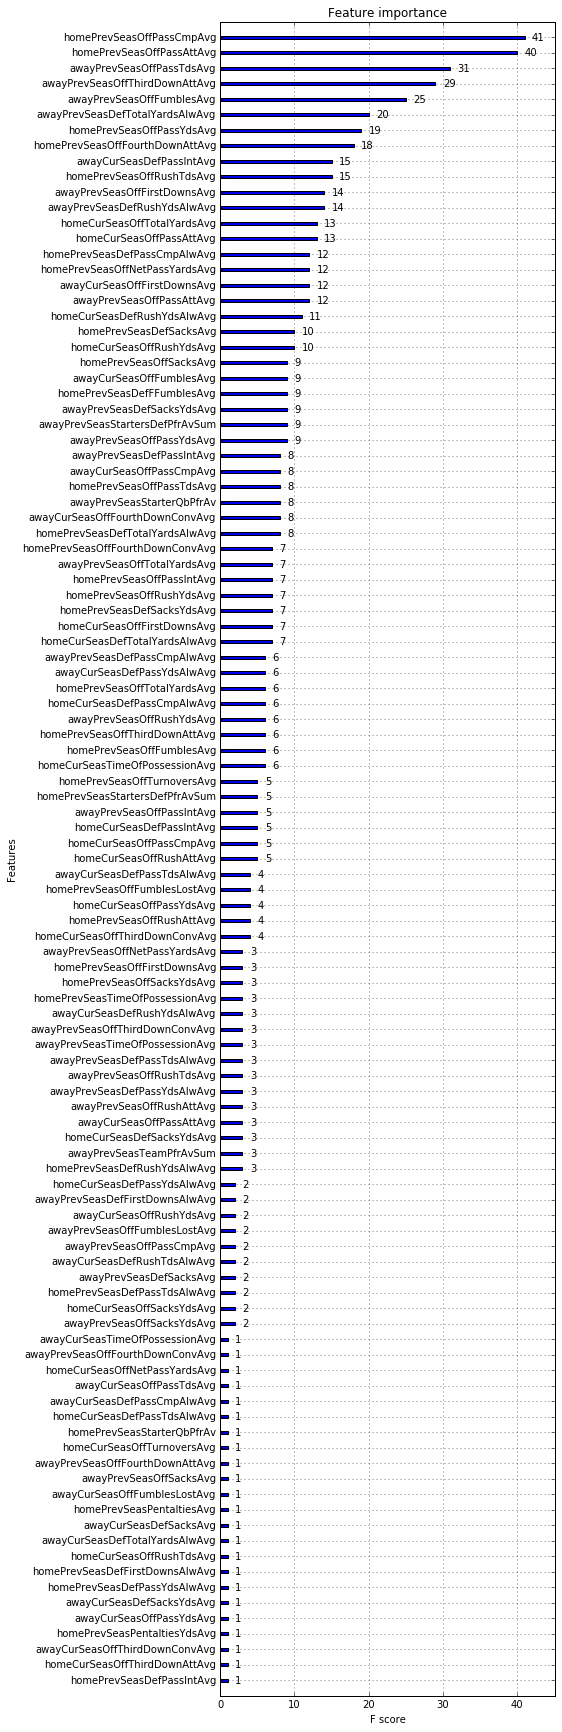

In [241]:
xgb.plot_importance(bst).get_figure().set_figheight(30)

# backfit on historical

In [242]:
foo = game_model_results.groupby(param_cols).apply(weighted_rmse).sort_values()

In [243]:
best_params_dict = {}
for i, r in foo[0:5].to_frame().iterrows():
    for j, p in enumerate(param_cols):
        best_params_dict[p] = i[j]

In [244]:
best_params = game_model_results.groupby(param_cols).apply(weighted_rmse).sort_values().argmin()
best_params_dict = {}

for i, p in enumerate(param_cols):
    best_params_dict[p] = best_params[i]
    
best_params_dict

{'colsample_bytree': 0.5,
 'eta': 0.050000000000000003,
 'gamma': 0.0,
 'max_depth': 3,
 'min_child_weight': 1,
 'round': 117,
 'subsample': 1.0}

In [245]:
top_n = 10
n = 0
preds = pd.DataFrame()

for i, r in foo[0:top_n].to_frame().iterrows():
    best_params_dict = {}
    for j, p in enumerate(param_cols):
        best_params_dict[p] = i[j]

    model_param = {
        'objective':'reg:linear',
        'eval_metric':'rmse',
        'nthread':5,
        'silent':1
    }

    param = best_params_dict.copy()
    param.update(model_param)

    pred_n=[]

    for season in range(2013, 2015 + 1):
        for week in range(1, 21 + 1):
            print '\rSeason {} - Week {}'.format(season, week),

            # setup X/y trn/tst
            X_trn = df_X.loc[idx[range(2009,season),:,:],]
            X_trn = X_trn.append(df_X.loc[idx[[season],range(1,week),:],])
            X_tst = df_X.loc[idx[[season],[week],:],]

            y_trn = df_y.loc[idx[range(2009,season),:,:],]
            y_trn = y_trn.append(df_y.loc[idx[[season],range(1,week),:],])
    #         y_tst = df_y.loc[idx[[season],[week],:],]

            # convert to DMatrix
            dtrn  = xgb.DMatrix(X_trn, label=y_trn)
    #         dtst  = xgb.DMatrix(X_tst, label=y_tst)

            # train model
            evallist  = [(dtrn,'train')]
            bst = xgb.train( param, dtrn, best_params_dict['round'], evallist ,verbose_eval=None)
            pred_n = np.append(pred_n, bst.predict(xgb.DMatrix(X_tst[contCols])))
    preds['p' + str(n)] = pred_n
    n += 1
print '\rDone!'

Done!


In [167]:
tdf = d[gmin].loc[idx[range(2013,2016),:],].copy()

In [168]:
tdf['trueLine'] = tdf['awayScore'] - tdf['homeScore']

In [169]:
tdf['predLine'] = preds.mean(axis=1).values #bst.predict(xgb.DMatrix(games[contCols]))

In [170]:
tdf.loc[idx[:,[1]],]

date   weekday startTime home away winner  \
season week bsID                                                            
2013   1    201309050den  2013-09-05  Thursday    9:13pm  den  rav    den   
            201309080buf  2013-09-08    Sunday    1:02pm  buf  nwe    nwe   
            201309080car  2013-09-08    Sunday    1:04pm  car  sea    sea   
            201309080chi  2013-09-08    Sunday    1:02pm  chi  cin    chi   
            201309080cle  2013-09-08    Sunday    1:02pm  cle  mia    mia   
            201309080clt  2013-09-08    Sunday    1:02pm  clt  rai    clt   
            201309080dal  2013-09-08    Sunday    8:30pm  dal  nyg    dal   
            201309080det  2013-09-08    Sunday    1:02pm  det  min    det   
            201309080jax  2013-09-08    Sunday    1:03pm  jax  kan    kan   
            201309080nor  2013-09-08    Sunday    1:03pm  nor  atl    nor   
            201309080nyj  2013-09-08    Sunday    1:03pm  nyj  tam    nyj   
            201309080pit  2013-09-08    Sunday    1:02pm  pit  oti    oti   
            201309080ram  2013-09-08    Sunday    4:23pm  ram  crd    ram   
            201309080sfo  2013-09-08    Sunday    4:26pm  sfo  gnb    sfo   
            201309090sdg  2013-09-09    Monday   10:25pm  sdg  htx    htx   
            201309090was  2013-09-09    Monday    7:10pm  was  phi    phi   
2014   1    201409040sea  2014-09-04  Thursday    8:42pm  sea  gnb    sea   
            201409070atl  2014-09-07    Sunday    1:03pm  atl  nor    atl   
            201409070chi  2014-09-07    Sunday    1:00pm  chi  buf    buf   
            201409070dal  2014-09-07    Sunday    4:25pm  dal  sfo    sfo   
            201409070den  2014-09-07    Sunday    8:30pm  den  clt    den   
            201409070htx  2014-09-07    Sunday    1:03pm  htx  was    htx   
            201409070kan  2014-09-07    Sunday    1:02pm  kan  oti    oti   
            201409070mia  2014-09-07    Sunday    1:03pm  mia  nwe    mia   
            201409070nyj  2014-09-07    Sunday    1:02pm  nyj  rai    nyj   
            201409070phi  2014-09-07    Sunday    1:02pm  phi  jax    phi   
            201409070pit  2014-09-07    Sunday    1:02pm  pit  cle    pit   
            201409070ram  2014-09-07    Sunday    1:00pm  ram  min    min   
            201409070rav  2014-09-07    Sunday    1:02pm  rav  cin    cin   
            201409070tam  2014-09-07    Sunday    4:25pm  tam  car    car   
            201409080crd  2014-09-08    Monday    9:20pm  crd  sdg    crd   
            201409080det  2014-09-08    Monday    7:11pm  det  nyg    det   
2015   1    201509100nwe  2015-09-10  Thursday    8:40pm  nwe  pit    nwe   
            201509130buf  2015-09-13    Sunday    1:03pm  buf  clt    buf   
            201509130chi  2015-09-13    Sunday    1:00pm  chi  gnb    gnb   
            201509130crd  2015-09-13    Sunday    3:05pm  crd  nor    crd   
            201509130dal  2015-09-13    Sunday    8:31pm  dal  nyg    dal   
            201509130den  2015-09-13    Sunday    4:25pm  den  rav    den   
            201509130htx  2015-09-13    Sunday    1:02pm  htx  kan    kan   
            201509130jax  2015-09-13    Sunday    1:03pm  jax  car    car   
            201509130nyj  2015-09-13    Sunday    1:04pm  nyj  cle    nyj   
            201509130rai  2015-09-13    Sunday    4:25pm  rai  cin    cin   
            201509130ram  2015-09-13    Sunday    1:00pm  ram  sea    ram   
            201509130sdg  2015-09-13    Sunday    4:05pm  sdg  det    sdg   
            201509130tam  2015-09-13    Sunday    4:25pm  tam  oti    oti   
            201509130was  2015-09-13    Sunday    1:02pm  was  mia    mia   
            201509140atl  2015-09-14    Monday    7:10pm  atl  phi    atl   
            201509140sfo  2015-09-14    Monday   10:20pm  sfo  min    sfo   

                          homeScore  awayScore  line  overUnder  \
season week bsID                                                  
2013   1    201309050den         49         27 

In [171]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

data = tdf#.loc[idx[:,[1]],]
print 'vegas rmse:', mean_squared_error(data['trueLine'], data['line'])**0.5
print 'model rmse:', mean_squared_error(data['trueLine'], data['predLine'])**0.5
print
print 'vegas mae:', mean_absolute_error(data['trueLine'], data['line'])
print 'model mae:', mean_absolute_error(data['trueLine'], data['predLine'])

vegas rmse: 14.7171097994
model rmse: 13.9897590606

vegas mae: 11.3639200999
model mae: 10.9142032368


In [172]:
(abs(tdf['trueLine'] - tdf['predLine']) < abs(tdf['trueLine'] - tdf['line'])).value_counts()

True     408
False    393
dtype: int64

# predict next week

In [184]:
wk = '02'

next_week = pd.read_csv('/Users/phil/Google Drive/nfl' + '/s2016w' + wk + '.csv', low_memory=False)
next_week.set_index(['season','week','bsID'], inplace=True)
next_week.sortlevel(inplace=True)

In [185]:
homeAwayOpp = {True:'away', False:'home'}
first_season = 2007

for i, r in next_week.iterrows():
    print '\r{}'.format(i),
    seas = i[0]
    week = i[1]
    next_week.loc[i, 'week'] = week
    
    for tm in ('home', 'away'):
        team = next_week.loc[i, tm]
        # previous season stats
        foo = d[stm].loc[idx[[seas-1],:,:,[team]],]
        for col in [c for c in d[stm].columns if c not in ('home', 'opponent')]:
            next_week.loc[i, tm + 'PrevSeas' + col[0].upper() + col[1:] + 'Avg'] = foo[col].mean()
            
        # current season stats
        foo = d[stm].loc[idx[[seas],range(1,week),:,[next_week.loc[i, tm]]],]
        for col in [c for c in d[stm].columns if c not in ('home', 'opponent')]:
            next_week.loc[i, tm + 'CurSeas' + col[0].upper() + col[1:] + 'Avg'] = foo[col].mean()
            
        # rest days
        if week==1:
            next_week.loc[i, tm + 'RestDays'] = 14.0
        else:
            df = d[gmin].loc[idx[[seas],[week-1,week-2],:],]
            gameDate = datetime.strptime(next_week.loc[i, 'date'], '%Y-%m-%d')
            lastGameDate = datetime.strptime(df[(df['home']==team) | (df['away']==team)]['date'][-1], '%Y-%m-%d')
            next_week.loc[i, tm + 'RestDays'] = (gameDate - lastGameDate).days
            
        # prev season pff approx value
        curRoster = [x[2] for x in d[tmrs].loc[idx[[seas],[team],:],].index.tolist()]
        next_week.loc[i, tm + 'PrevSeasTeamPfrAv' + 'Sum'] = d[tmrs].loc[idx[[seas-1],:,curRoster],]['pfrApproxValue'].sum()
        foo = d[strt].loc[idx[[seas-1],:,:,:,curRoster],]
        prevSeasStartersOff = set([x[4] for x in foo[foo.offense == True].index.tolist()])
        prevSeasStartersDef = set([x[4] for x in foo[foo.offense == False].index.tolist()])
        next_week.loc[i, tm + 'PrevSeasStartersOffPfrAv' + 'Sum'] = d[tmrs].loc[idx[[2014],:,prevSeasStartersOff],]['pfrApproxValue'].sum()
        next_week.loc[i, tm + 'PrevSeasStartersDefPfrAv' + 'Sum'] = d[tmrs].loc[idx[[2014],:,prevSeasStartersDef],]['pfrApproxValue'].sum()

(2016, 2, 'bs9')


In [186]:
pred_X = next_week[contCols]
dtrn  = xgb.DMatrix(pred_X)

In [187]:
ypred = bst.predict(dtrn)

In [201]:
print 'home\taway\thome spread'
for i in range(len(next_week)):
    print next_week.home[i], '\t', next_week.away[i], '\t', round(ypred[i], 1)

home	away	home spread
buf 	nyj 	-2.2
ram 	sea 	1.1
crd 	tam 	-8.2
den 	clt 	-4.6
sdg 	jax 	-5.0
rai 	atl 	-3.6
min 	gnb 	-2.7
chi 	phi 	-4.0
nyg 	nor 	-0.4
nwe 	mia 	-5.6
pit 	cin 	-3.7
car 	sfo 	-9.3
det 	oti 	-10.4
cle 	rav 	1.4
htx 	kan 	0.9
was 	dal 	-3.7


In [189]:
from sportsref import nfl

In [196]:
foo = nfl.Team('nwe')

In [197]:
foo.name()

'Boston/New England Patriots'

# testing

In [204]:
d[strt]

playerName position   home  \
season week bsID         team playerID                                         
2007   1    200709060clt clt  AddaJo00          Joseph Addai       RB   True   
                              BethAn20        Antoine Bethea       FS   True   
                              BracGa20         Gary Brackett      MLB   True   
                              BrocRa20          Raheem Brock      LDT   True   
                              ClarDa00          Dallas Clark       TE   True   
                              DiemRy20             Ryan Diem       RT   True   
                              FreeDw00        Dwight Freeney      RDE   True   
                              HarrMa00       Marvin Harrison       WR   True   
                              HaydKe20         Kelvin Hayden      LCB   True   
                              JackMa22        Marlin Jackson      RCB   True   
                              JohnEd99        Edward Johnson      RDT   True   
                              KeiaFr20         Freddy Keiaho      WLB   True   
                              LiljRy20            Ryan Lilja       LG   True   
                              MannPe00        Peyton Manning       QB   True   
                              MathRo20         Robert Mathis      LDE   True   
                              MorrRo20            Rob Morris      SLB   True   
                              SandBo99           Bob Sanders       SS   True   
                              SatuJe55         Jeff Saturday        C   True   
                              ScotJa21            Jake Scott       RG   True   
                              UgohTo20             Tony Ugoh       LT   True   
                              UtecBe00            Ben Utecht      H-B   True   
                              WaynRe00          Reggie Wayne       WR   True   
                         nor  BreeDr00            Drew Brees       QB  False   
                              BrowJa55          Jammal Brown       LT  False   
                              BullJo20         Josh Bullocks       FS  False   
                              ClanKe20       Kendrick Clancy       NT  False   
                              ColsMa00       Marques Colston       WR  False   
                              DaviJa20           Jason David      RCB  False   
                              EvanJa21           Jahri Evans       RG  False   
                              FainJe20            Jeff Faine        C  False   
...                                                      ...      ...    ...   
2016   1    201609120was pit  PounMa20      Maurkice Pouncey        C  False   
                              RoetBe00    Ben Roethlisberger       QB  False   
                              RogeEl00            Eli Rogers       TE  False   
                              ShazRy00          Ryan Shazier     LILB  False   
                              TimmLa99      Lawrence Timmons     RILB  False   
                              TuitSt00         Stephon Tuitt      RDE  False   
                              VillAl00  Alejandro Villanueva       LT  False   
                              WillDe02     DeAngelo Williams       RB  False   
                         was  BakeCh99           Chris Baker      RDE   True   
                              BreeBa00      Bashaud Breeland       CB   True   
                              BrutDa99          David Bruton       SS   True   
                              CompWi00       William Compton      MLB   True   
                              CousKi00          Kirk Cousins       QB   True   
                              CrowJa00       Jamison Crowder       WR   True   
                              FostMa00          Mason Foster      MLB   True   
                              GarcPi00         Pierre Garcon       WR   True   
                              GolsKe20        Kedric Golston       NT   True   
                              HallDe99         DeA